## Development of Algorithm for Removing Duplicate Points within a specified tolerence

I started with the simple logic of Calculating the distance of each point to all other remaining point and removing the point if the distance is less than the tolerence. This is Brutforce mathod which will have time complexity of O(n^2). I needed to decrease it. 

Before jumping to 3D I started developing the alogorithm for 2D and then extended the same for 3D.



In [1]:
# File creation
# Last updated by Onkar Salunkhe on 25 Oct 2020

import random

# Function for creating a random Point with Float values
def random_floats(min, max, size):
   # min = Minimum value of co-ordinate
   # max = Maximum value of co-ordinate
   # size = 2 for 2D point and 3 for 3D point
   return [random.uniform(min, max) for _ in range(size)]

# Create a file
Data= open("Random_Points.txt","w+")

K = 100 # Number of Input Points

# Writing the Points in the file 
with open('Random_Points.txt', 'w+') as filehandle:
    for i in range(K):
        Point = random_floats(0, 1, 2)
        #filehandle.writelines("%s" % x for x in Point)
        filehandle.writelines(" ".join(str(x) for x in Point))
        filehandle.writelines("\n")

# Close file      
Data.close  


<function TextIOWrapper.close()>

In [2]:
# Opening an existing file with point cloud
Data=open("Random_Points.txt","r")
# Reading each point
Point=Data.readlines()
# Writing each point in the list
lst2D = []
for i in Point:
    #print(i)
    m1=i.split()
    arr=[]
    for j in range(2):
        arr.append(float(m1[j]))
    lst2D.append(arr)
# Total number of Points in the file
print(len(lst2D))

100


In [3]:
# Function implementations which can also be included in the header file

# Function to calculate distance between two points in 2D
def distance2D(Point1,Point2):
  # Point1 = List of co-ordinates of fisrt point in 2D
  # Point2 = List of co-ordinates of second point in 2D
  # return the distance between the points using distance formula
  return math.sqrt((Point1[0]-Point2[0])**2+(Point1[1]-Point2[1])**2)

# Function to calculate distance between two points in 3D
def distance3D(Point1,Point2):
  # Point1 = List of co-ordinates of fisrt point in 3D
  # Point2 = List of co-ordinates of second point in 3D
  # return the distance between the points using distance formula
  return math.sqrt((Point1[0]-Point2[0])**2+(Point1[1]-Point2[1])**2+(Point1[2]-Point2[2])**2)

# Function to calculate distance along x-axis
def distance_x(Point1,Point2):
  # Point1 = List of co-ordinates of fisrt point in 2D or 3D
  # Point2 = List of co-ordinates of second point in 2D or 3D
  # return the value of absolute difference in x-co-ordinates
  return abs(Point1[0]-Point2[0])

# Function to calculate distance along y-axis
def distance_y(Point1,Point2):
  # Point1 = List of co-ordinates of fisrt point in 2D or 3D
  # Point2 = List of co-ordinates of second point in 2D or 3D
  # return the value of absolute difference in y-co-ordinates
  return abs(Point1[1]-Point2[1])

# Function to calculate distance along z-axis
def distance_z(Point1,Point2):
  # Point1 = List of co-ordinates of fisrt point in 2D or 3D
  # Point2 = List of co-ordinates of second point in 2D or 3D
  # return the value of absolute difference in z-co-ordinates
  return abs(Point1[2]-Point2[2])

##Algoritham:
It will start with sorting the list of points according to x-co-ordinates. It will select the staring point and count the number of points which are within the tolerence in x-direction which is called x-strip. And it will calcuate the the distance in y-direction for only those selected points. This will reduce the computations compareed to Brutforce method as we are not calculating the distance of each point to all points.
Similarly it will reduce the computations in the y-direction.


100
44
0.0


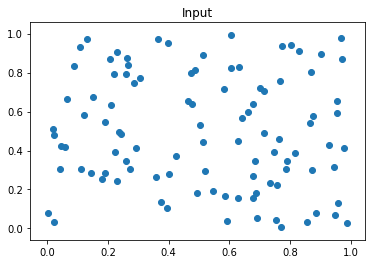

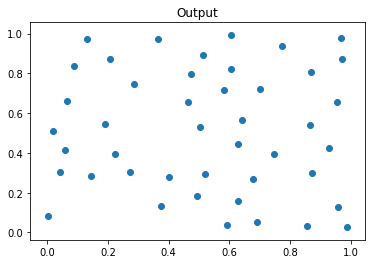

In [5]:
# Algorithm for removing the points within tolerence
# 2D

import matplotlib.pyplot as plt
import time
import math

# Visualization of Points in the list
plt.figure(1)
plt.scatter(*zip(*lst2D))
plt.title('Input')

# Start the timer
start=time.time()

# Sort the list with x-co-ordinate and assign it to the updated list
updated_list_2D = sorted(lst2D)
print(len(updated_list_2D))

# Tolerence under which the points to be removed
tol=0.1 

# Algorithm 
i=0 # Start with the first element in the updated list as the base point
j=0 
while i<=len(updated_list_2D)-1:
  Count=0 # Count initialization

  while Count<len(updated_list_2D)-i and distance_x(updated_list_2D[i],updated_list_2D[i+Count])<tol:
    Count+=1  # Count the number of points which lies within the tolerence in only x-direction
  j=i # Start with the base point i.e. First element of updated list
  # Traverse in the list only upto the point where the x-co-ordinate is within the tolerence i.e. x-strip
  while Count>0 and j<len(updated_list_2D)-1: 
    # Check whether the y-co-ordinate is within tolerence or not
    if abs(updated_list_2D[i][1]-updated_list_2D[j+1][1])<tol:
        # Check the actual distance between the points
        dist=distance2D(updated_list_2D[i],updated_list_2D[j+1])
        # Remove the points if under tolerence else check for the next point
        if dist<tol:
            # Remove element formt the list
            updated_list_2D.pop(j+1)
            j-=1
    j+=1
    # Update the count
    Count-=1
  # Move to next point as base point in the list
  i+=1

# Stop the timer
end=time.time()

# Check the total numeber of points in the updated list
print(len(updated_list_2D))

# Print the total time needed for the algorithm
print(end-start)

# Visualization of the new point cloud
plt.figure(2)
plt.scatter(*zip(*updated_list_2D))
plt.title('Output')
plt.show()


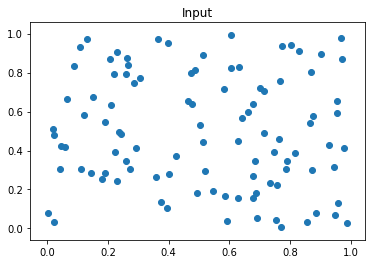

100
44
0.11462521553039551


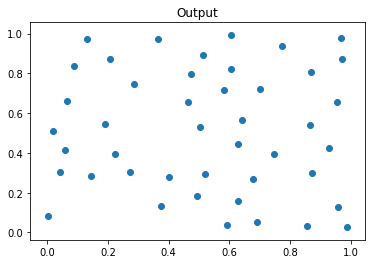

In [6]:
# Validating and comparing with the straigh-forward method  
# Brute Force Method with O(n^2)
# 2D

import time
import math
import matplotlib.pyplot as plt

# Start the timer
start=time.time()

# Visualization of the point cloud in the given file
plt.scatter(*zip(*lst2D))
plt.title('Input')
plt.show()

# Sort the list of points with x-co-ordinate
updated_list_ref =sorted(lst2D)
# Number of points in the Point cloud
print(len(updated_list_ref))

# Tolerence under which the points to be removed
tol=0.1

# Algorithm 
i=0 # Start with the first element in the updated list as the base point

# Traverse in the list
while i< len(updated_list_ref)-1:
  j=i+1 
  # Go until the last point of the updated list
  while j <len(updated_list_ref):
    # Check for the distance in only x and only y-directions within the tolerence
    if (distance_x(updated_list_ref[i],updated_list_ref[j]))<tol and (distance_y(updated_list_ref[i],updated_list_ref[j]))<tol :
      # Calculate the actual distance between the points
      dist=distance2D(updated_list_ref[i],updated_list_ref[j])
      # Remove the point if the distance is less than tolerence
      if dist<tol:
        updated_list_ref.pop(j)
        j-=1
    # Move to next point
    j+=1
  # Move to next point as base point
  i+=1

# Stop the timer
end=time.time()
# Number of points in the new point cloud
print(len(updated_list_ref))
# Print the total time for the algorithm
print(end-start)

# Visualization of new point cloud
plt.scatter(*zip(*updated_list_ref))
plt.title('Output')
plt.show()

We get the same results for both Brutforce method and Algorithm but with the reduced time.

In [7]:
# Create a new file to store the updated points
Data= open("Updated_Points.txt","w+")

# Writing the new Points in the file 
with open('Updated_Points.txt', 'w+') as filehandle:
    for i in range(0,len(updated_list_2D)):
        filehandle.writelines(" ".join(str(x) for x in updated_list_2D[i]))
        filehandle.writelines("\n")

# Close file      
Data.close  

<function TextIOWrapper.close()>